# Character Box

In [7]:
# Part 0: Imports
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

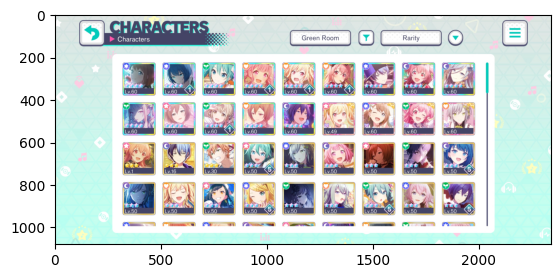

In [8]:
# Part 1: Load image
# Some things to note:
# - OpenCV loads into BGR format, but Matplotlib expects RGB - need to convert
# - OpenCV uses Mat (matrix), while Numpy uses it's own arrays - needs conversion when moving between them
img_bgr = cv.imread('../docs/character-list.jpg')
img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

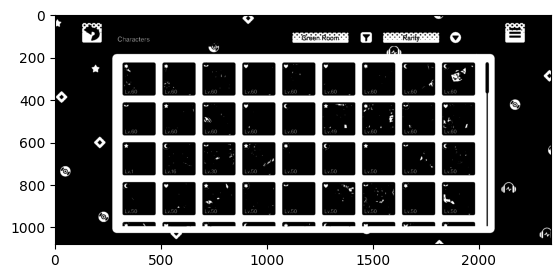

In [9]:
# Part 2: Finding white box containing characters
# May not be necessary, but should make it easier to filter out noise

# First, threshold the image to just white pixels
# https://docs.opencv.org/4.7.0/d7/d4d/tutorial_py_thresholding.html
# Basically, I want anything that's close to white (250+) to remain white, and turn the rest black
img_grayscale = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
_, img_white_only = cv.threshold(img_grayscale, 250, 255, cv.THRESH_BINARY)
plt.imshow(img_white_only, cmap='gray')

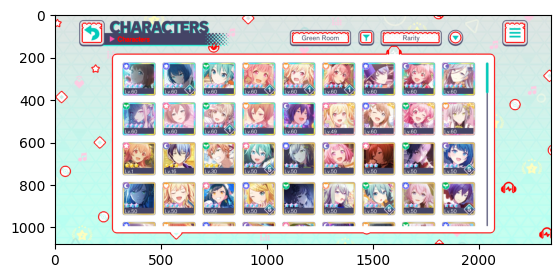

In [10]:
# Find the bounding box for any white rectangles
# This can be done by looking for contours
img_contours = img_rgb.copy()
contours, _ = cv.findContours(img_white_only.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(img_contours, contours, -1, (255, 0, 0), 3)

plt.imshow(img_contours)

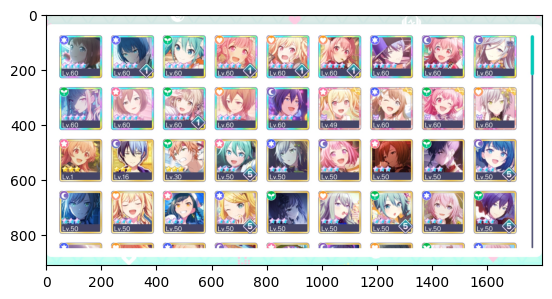

In [11]:
# The character box is guaranteed to be the largest contour, so use this
contour_areas = [cv.contourArea(c) for c in contours]
max_index = np.argmax(contour_areas)
max_contour = contours[max_index]
x, y, w, h = cv.boundingRect(max_contour)

# Note that x and y are flipped
img_cropped = img_rgb[y:y+h, x:x+w]
plt.imshow(img_cropped)

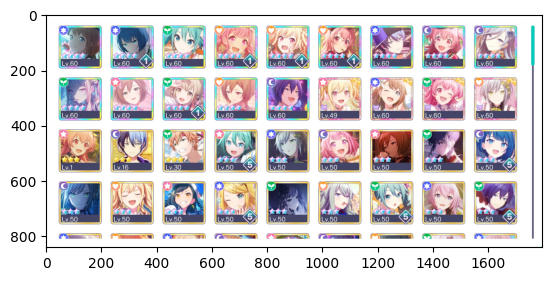

In [12]:
# We can do better by approximating the largest contour into a rectangle
# This should eliminate any floating white icons in the background
max_contour_rect = cv.approxPolyDP(max_contour, 0.1 * cv.arcLength(max_contour, True), True)
x2, y2, w2, h2 = cv.boundingRect(max_contour_rect)

img_cropped_2 = img_rgb[y2:y2+h2, x2:x2+w2]
plt.imshow(img_cropped_2)